In [1]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

Using TensorFlow backend.


In [2]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [3]:
plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

In [4]:
# show all original/decoded frames from an episode

In [5]:
M = 300 + 1

DIR_NAME = './data/rollout/'
file_index = 1
file = os.listdir(DIR_NAME)[file_index]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1022929453.npz
(301, 64, 64, 3)


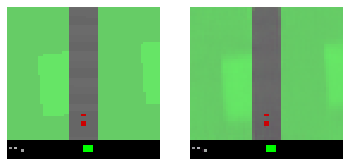

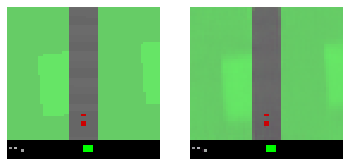

In [6]:
for idx in range(0, M):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    
    ax1 = plt.subplot(121)
    plt.imshow(obs)
    ax1.axis('off')
    
    ax2 = plt.subplot(122)
    plt.imshow(z_decoded)
    ax2.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

In [7]:
# show one original/decoded frame from an episode

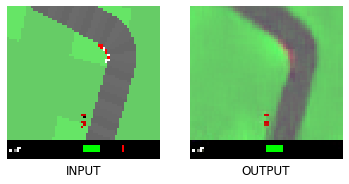

In [8]:
DIR_NAME = './data/rollout/'
file_index = 2
file = os.listdir(DIR_NAME)[file_index]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[300]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow(obs)
ax1.axis('off')
ax1.text(0.5, -0.1, 'INPUT', size=12, ha='center', transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow(reconstruction)
ax2.axis('off')
ax2.text(0.5, -0.1, 'OUTPUT', size=12, ha='center', transform=ax2.transAxes)
None

In [9]:
# show mu, log_var, and z

In [10]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print(f'mu = {mu}')
print()
print(f'log_var = {log_var}')
print()
encoded_z = vae.encoder.predict(np.array([obs]))[0]
print(f'z = {encoded_z}')

mu = [-0.817  -0.0071  0.0416 -0.0153  0.0111  0.0074  0.0268  0.0268 -0.0887
  0.0152 -1.4712  0.0864  0.0413  0.045  -0.0109 -0.0607  1.5847 -0.1437
  1.2569  0.042  -0.0438 -0.0076  0.0241 -0.0164  0.0591 -1.8882 -0.0453
 -1.3157  0.0541  0.012  -0.0188  0.0066]

log_var = [-5.8488 -0.0269 -0.0262 -0.0133 -0.0642  0.0118 -0.0203 -0.0089 -0.1066
 -0.0014 -2.5678 -0.0257 -0.0239 -0.007  -0.0036 -0.0231 -2.7887 -1.0334
 -2.9545  0.0085 -0.014  -0.0565 -0.025   0.0247  0.0018 -4.2255  0.0178
 -3.5897 -5.4278  0.0096 -0.0322  0.0106]

z = [-0.6544 -1.9409  1.3504  0.0707  1.0482 -0.5386 -0.2075 -0.954  -1.9888
  0.555  -1.0509  2.2441  0.8981 -0.324   0.4015 -1.2516  1.611  -0.9568
  1.4969  0.6892  0.6217 -0.2235  0.3328  0.7935  0.4099 -1.8989 -0.0271
 -1.3145  0.0752  0.9537 -0.7603  0.3974]


In [11]:
# show mu, log_var, and informative dimens

mu


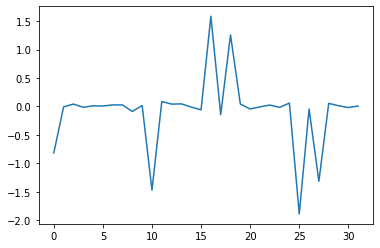

In [12]:
plt.plot(mu)
print('mu')

log_var
number of informative dims: 9
informative dimens: [ 0  8 10 16 17 18 25 27 28]


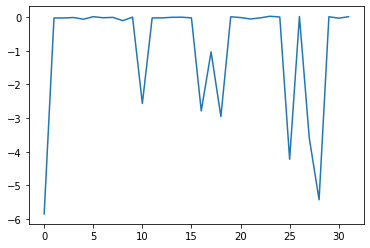

In [13]:
plt.plot(log_var);
hot_dims = np.where(abs(log_var) > 0.1)[0]
print('log_var')
print(f'number of informative dims: {hot_dims.shape[0]}')
print(f'informative dimens: {hot_dims}')

In [14]:
# show interpolation

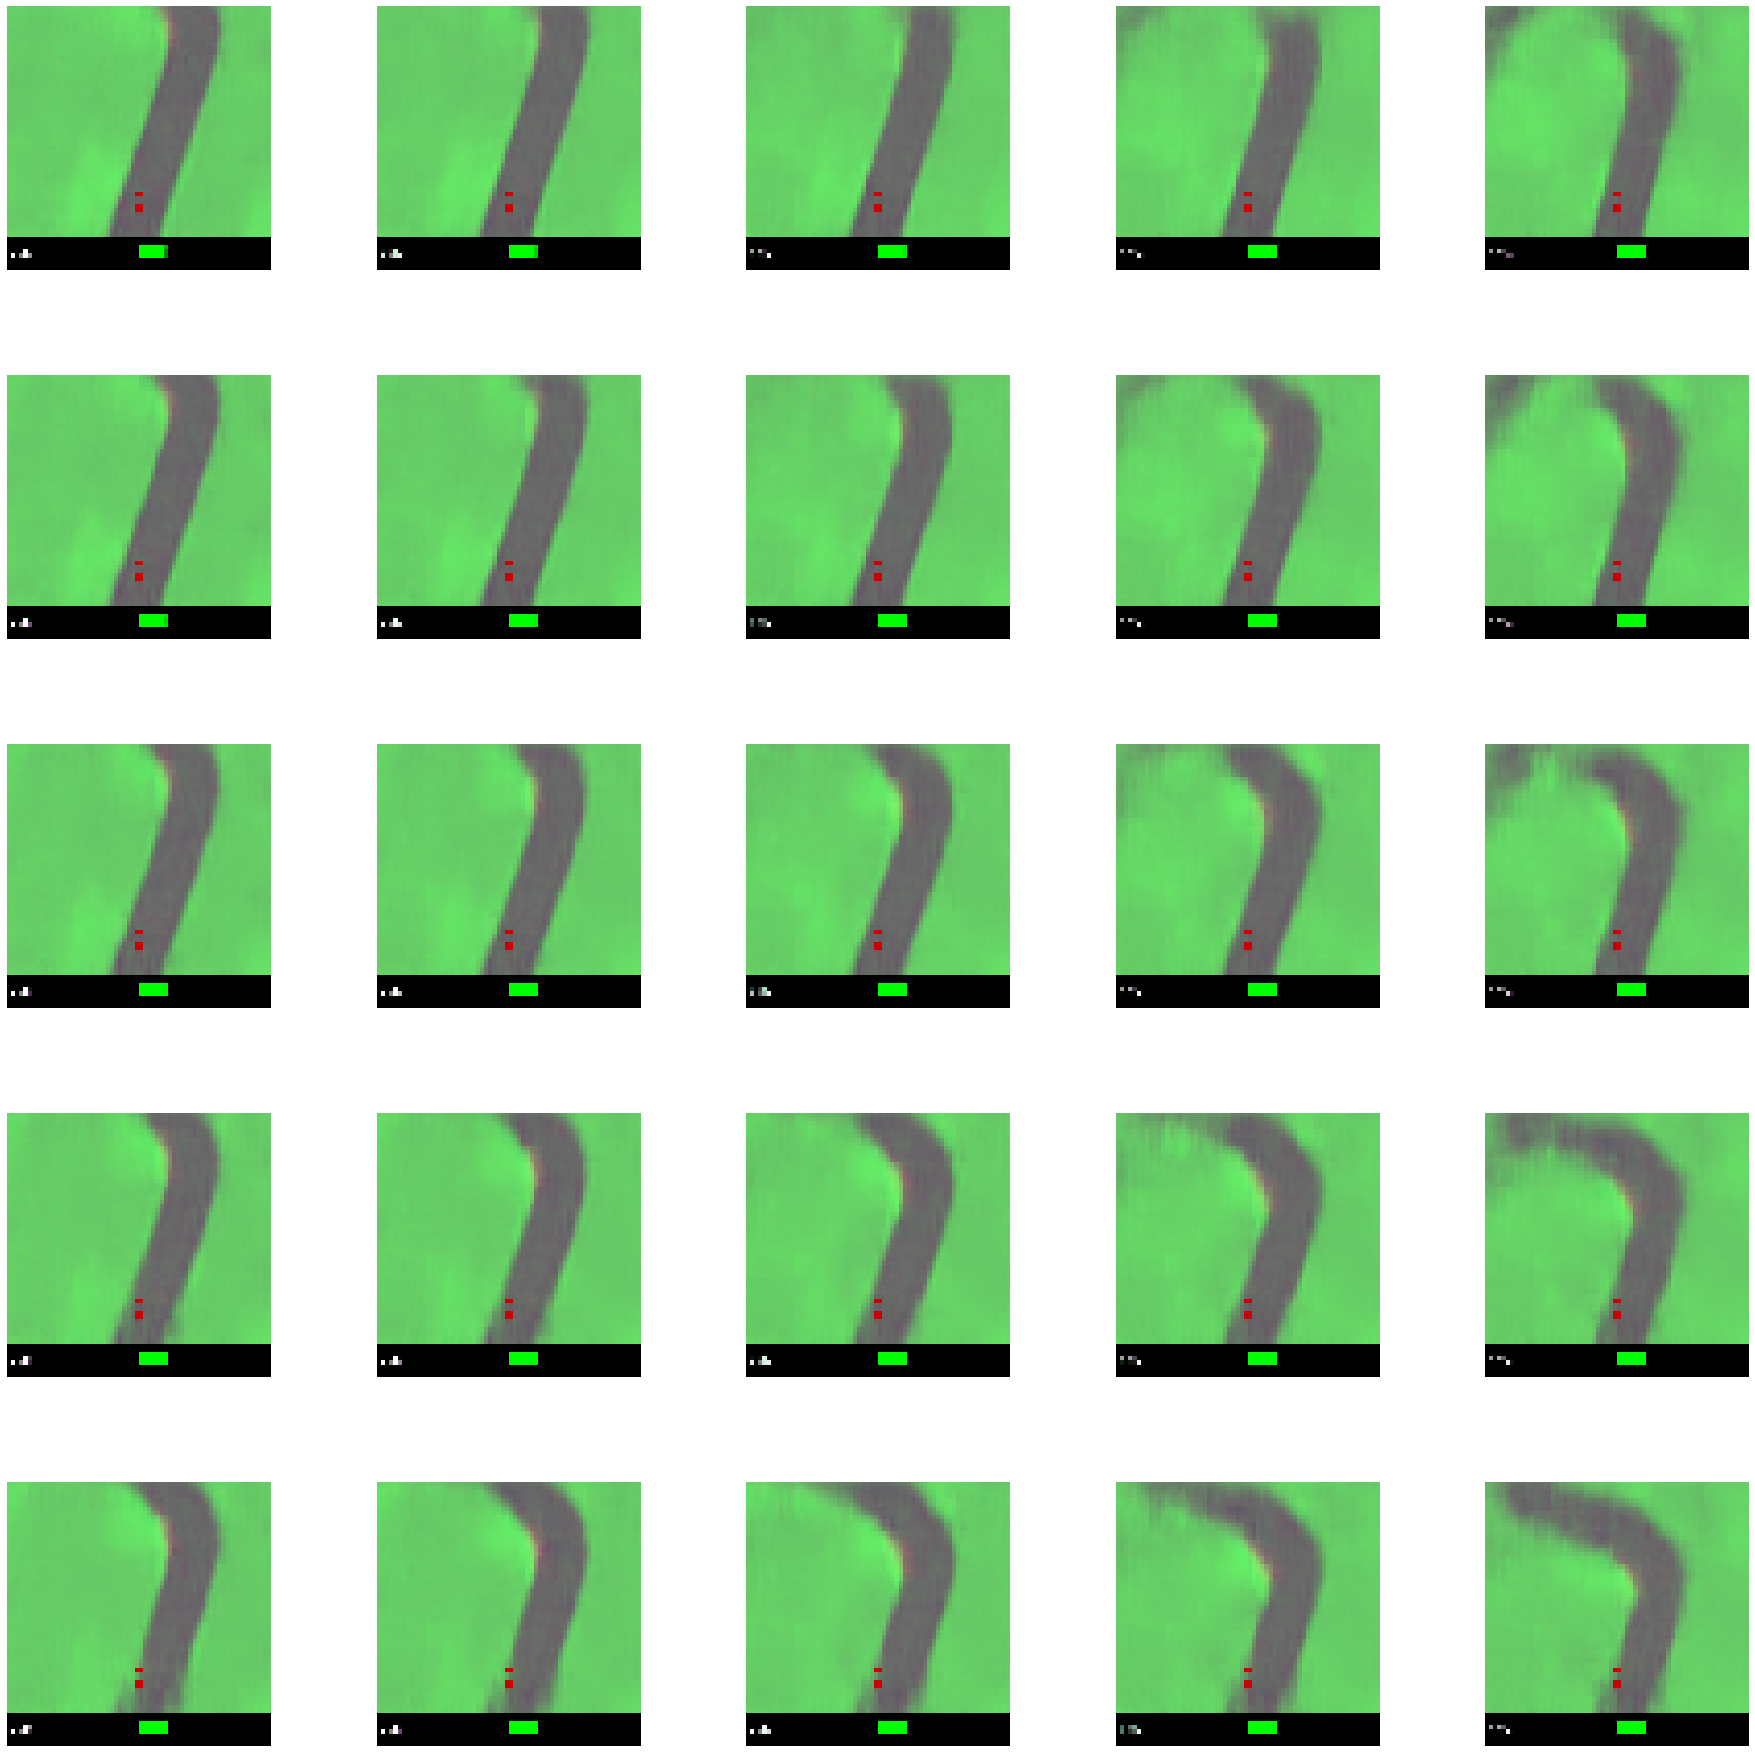

In [17]:
files = [os.listdir(DIR_NAME)[i] for i in [1, 2, 3]]

obs_list = [np.load(DIR_NAME + file)['obs'] for file in files]

zs = [vae.encoder.predict(np.array([obs[300]]))[0] for obs in obs_list]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32, 32), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.4)

for x in range(5):
    for y in range(5):
        
        z = zs[0] + (zs[1] - zs[0]) * x / 8.0 + (zs[2] - zs[0]) *  y / 8.0
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x, y].set_axis_off()
        
        axes[x, y].imshow(decoded_obs)
        
plt.show()

In [19]:
adjustable_z = np.array([0.0] * 32)

# the informative dims (and their number)
# change when the vae is trained
# therefore, the slider has to initialized
# programmatically based on the informative dims

def play_with_z(**kwargs):
    for zdim in kwargs:
        dim = int(zdim[1:])
        adjustable_z[dim] = kwargs[zdim]
    decoded_obs = vae.decoder.predict(np.array([adjustable_z]))[0]
    plt.gca().cla() 
    plt.imshow(decoded_obs)

slider_settings = (-2.0, 2.0, 0.1)
kwargs = {f'z{dim}':slider_settings for dim in hot_dims}    
interact(play_with_z, **kwargs)
None

interactive(children=(FloatSlider(value=0.0, description='z0', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…